In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#### Step 1: Load the Data

In [2]:
# Load all sheets from the Excel file
file_path = "HrData.xlsx"

# قراءة الشيتات المطلوبة
xls = pd.ExcelFile(file_path)
df_employee = pd.read_excel(xls, sheet_name="Employee")
df_performance = pd.read_excel(xls, sheet_name="PerformanceRating")

# حساب الفجوة التدريبية

df_performance["TrainingGap"] = df_performance["TrainingOpportunitiesWithinYear"] - df_performance["TrainingOpportunitiesTaken"]

# تلخيص الفجوات التدريبية
gap_summary = df_performance["TrainingGap"].describe()
print("\nإحصائيات الفجوة التدريبية:\n", gap_summary)

# استخراج الموظفين الذين لديهم أكبر فجوات تدريبية (Top 10)
top_training_gaps = df_performance.sort_values(by="TrainingGap", ascending=False).head(10)

# جلب بياناتهم من جدول Employee
df_employee_selected = df_employee[df_employee["EmployeeID"].isin(top_training_gaps["EmployeeID"])]

# دمج بيانات الأداء مع بيانات الموظفين
df_gap_analysis = pd.merge(top_training_gaps, df_employee_selected, on="EmployeeID", how="left")

# اختيار الأعمدة المهمة
df_gap_analysis = df_gap_analysis[["EmployeeID", "FirstName", "LastName", "Department", 
                                    "TrainingOpportunitiesWithinYear", "TrainingOpportunitiesTaken", "TrainingGap"]]

# عرض الموظفين العشرة الأكثر احتياجًا للتدريب
print("\nالموظفون الأكثر احتياجًا للتدريب:\n", df_gap_analysis)



إحصائيات الفجوة التدريبية:
 count    6709.000000
mean        1.147116
std         1.014636
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TrainingGap, dtype: float64

الموظفون الأكثر احتياجًا للتدريب:
   EmployeeID FirstName    LastName       Department  \
0  3EB2-9111    Ginger      Blinde       Technology   
1  2E72-4BF1     Grace      Gohier            Sales   
2  5468-EEE1    Forbes     Toretta       Technology   
3  10E9-4C86  Ignacius    Dockrill       Technology   
4  D676-4ECC  Florenza      Nesbit       Technology   
5  2B7A-9C73   Bryanty  Wickersley       Technology   
6  B6EC-313E    Corbin      Gooddy  Human Resources   
7  7749-B277     Caryl    Roycroft  Human Resources   
8  1799-5B3F     Howey      Woolis            Sales   
9  819A-2C9C   Hillary      Atchly       Technology   

   TrainingOpportunitiesWithinYear  TrainingOpportunitiesTaken  TrainingGap  
0                                3               


إحصائيات الفجوة التدريبية:
 count    6709.000000
mean        1.147116
std         1.014636
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TrainingGap, dtype: float64

الموظفون الأكثر احتياجًا للتدريب:
   EmployeeID FirstName    LastName       Department  \
0  3EB2-9111    Ginger      Blinde       Technology   
1  2E72-4BF1     Grace      Gohier            Sales   
2  5468-EEE1    Forbes     Toretta       Technology   
3  10E9-4C86  Ignacius    Dockrill       Technology   
4  D676-4ECC  Florenza      Nesbit       Technology   
5  2B7A-9C73   Bryanty  Wickersley       Technology   
6  B6EC-313E    Corbin      Gooddy  Human Resources   
7  7749-B277     Caryl    Roycroft  Human Resources   
8  1799-5B3F     Howey      Woolis            Sales   
9  819A-2C9C   Hillary      Atchly       Technology   

   TrainingOpportunitiesWithinYear  TrainingOpportunitiesTaken  TrainingGap  
0                                3               

/tmp/ipykernel_156814/2609789910.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=box_grid_counts.index, y=box_grid_counts.values, palette="viridis")


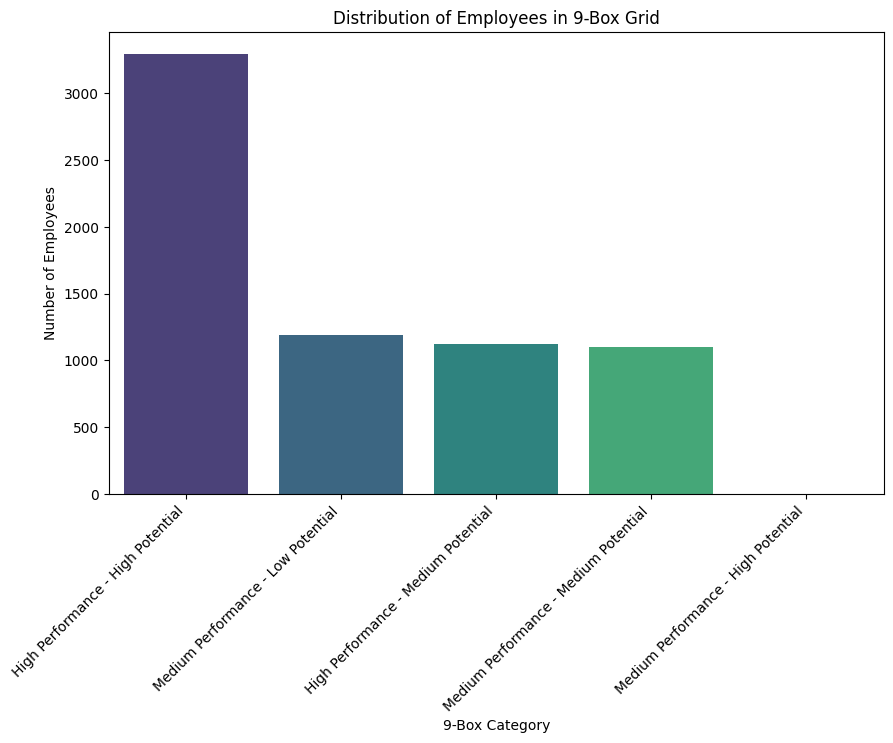

In [ ]:
# تحميل الملف
file_path = "HrData.xlsx"

# قراءة الشيتات المطلوبة
xls = pd.ExcelFile(file_path)
df_employee = pd.read_excel(xls, sheet_name="Employee")
df_performance = pd.read_excel(xls, sheet_name="PerformanceRating")
df_rating = pd.read_excel(xls, sheet_name="RatingLevel")

# حساب الفجوة التدريبية
df_performance["TrainingGap"] = df_performance["TrainingOpportunitiesWithinYear"] - df_performance["TrainingOpportunitiesTaken"]

# تلخيص الفجوات التدريبية
gap_summary = df_performance["TrainingGap"].describe()
print("\nإحصائيات الفجوة التدريبية:\n", gap_summary)

# استخراج الموظفين الذين لديهم أكبر فجوات تدريبية (Top 10)
top_training_gaps = df_performance.sort_values(by="TrainingGap", ascending=False).head(10)

# جلب بياناتهم من جدول Employee
df_employee_selected = df_employee[df_employee["EmployeeID"].isin(top_training_gaps["EmployeeID"])]

# دمج بيانات الأداء مع بيانات الموظفين
df_gap_analysis = pd.merge(top_training_gaps, df_employee_selected, on="EmployeeID", how="left")

# اختيار الأعمدة المهمة
df_gap_analysis = df_gap_analysis[["EmployeeID", "FirstName", "LastName", "Department", 
                                    "TrainingOpportunitiesWithinYear", "TrainingOpportunitiesTaken", "TrainingGap"]]

# عرض الموظفين العشرة الأكثر احتياجًا للتدريب
print("\nالموظفون الأكثر احتياجًا للتدريب:\n", df_gap_analysis)

# تحليل 9-Box Grid
# تحديد مستويات الأداء والإمكانات

def classify_9_box(performance, potential):
    if performance <= 2:
        perf_level = "Low"
    elif performance == 3:
        perf_level = "Medium"
    else:
        perf_level = "High"
    
    if potential <= 2:
        pot_level = "Low"
    elif potential == 3:
        pot_level = "Medium"
    else:
        pot_level = "High"
    
    return f"{perf_level} Performance - {pot_level} Potential"

# افتراض أن تقييم المدير يمثل الإمكانات المستقبلية
df_performance["9-Box Category"] = df_performance.apply(
    lambda row: classify_9_box(row["SelfRating"], row["ManagerRating"]), axis=1
)

# عرض توزيع الموظفين عبر الشبكة
box_grid_counts = df_performance["9-Box Category"].value_counts()
print("\nتوزيع الموظفين حسب 9-Box Grid:\n", box_grid_counts)

# إنشاء مخطط التوزيع باستخدام Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=box_grid_counts.index, y=box_grid_counts.values, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.xlabel("9-Box Category")
plt.ylabel("Number of Employees")
plt.title("Distribution of Employees in 9-Box Grid")
plt.show()


كل اللي جي هو الحته اللي بايظه


متوسطات محاور بطاقة الأداء المتوازن:
 {'Financial Performance': np.float64(3.9840512744075123), 'Employee Satisfaction': 0, 'Internal Processes': 0, 'Learning & Growth': 0}


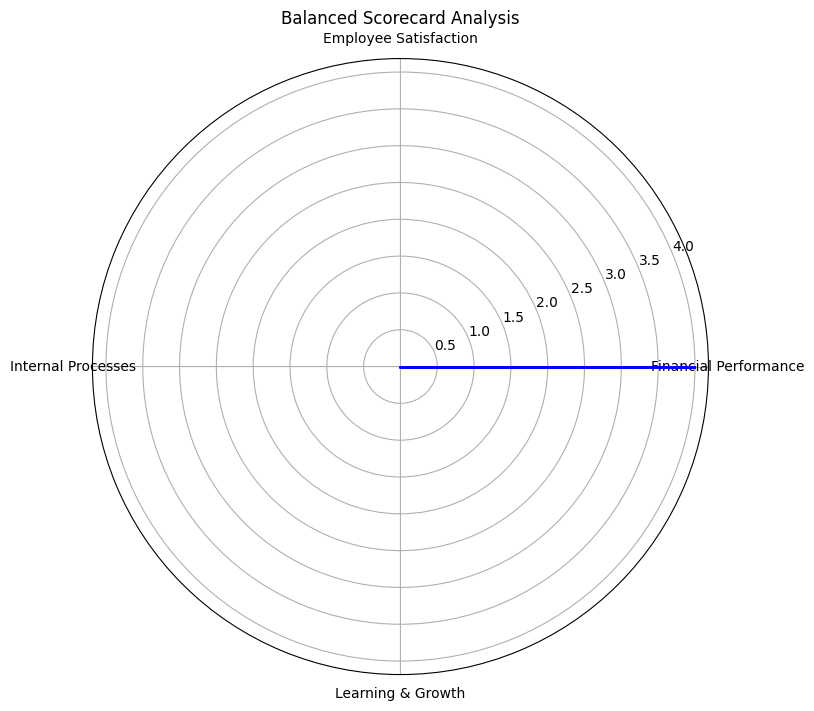

In [4]:
# تحميل الملف
file_path = "HrData.xlsx"

# قراءة الشيتات المطلوبة
xls = pd.ExcelFile(file_path)
df_employee = pd.read_excel(xls, sheet_name="Employee")
df_performance = pd.read_excel(xls, sheet_name="PerformanceRating")
df_rating = pd.read_excel(xls, sheet_name="RatingLevel")
df_satisfaction = pd.read_excel(xls, sheet_name="SatisfiedLevel")
df_education = pd.read_excel(xls, sheet_name="EducationLevel")

# تحويل بيانات رضا الموظفين إلى أرقام إذا كانت نصوصًا
df_satisfaction["SatisfactionLevel"] = pd.to_numeric(df_satisfaction["SatisfactionLevel"], errors="coerce")

# التحقق من وجود عمود "Rating"
rating_mean = df_rating["Rating"].mean() if "Rating" in df_rating.columns else 0

# تحويل بيانات المستوى التعليمي إلى قيم رقمية
df_education["EducationLevel"] = pd.to_numeric(df_education["EducationLevel"], errors="coerce")

# حساب الفجوة التدريبية
df_performance["TrainingGap"] = df_performance["TrainingOpportunitiesWithinYear"] - df_performance["TrainingOpportunitiesTaken"]

# تحليل Balanced Scorecard
bsc_metrics = {
    "Financial Performance": df_performance["SelfRating"].mean(),
    "Employee Satisfaction": df_satisfaction["SatisfactionLevel"].mean(skipna=True),
    "Internal Processes": rating_mean,
    "Learning & Growth": df_education["EducationLevel"].mean(skipna=True)
}

# تعويض أي قيم غير متوفرة بـ 0 لضمان رسم المخطط بشكل صحيح
bsc_metrics = {key: (0 if pd.isna(value) else value) for key, value in bsc_metrics.items()}
print("\nمتوسطات محاور بطاقة الأداء المتوازن:\n", bsc_metrics)

# رسم المخطط الراداري (Radar Chart)
def plot_radar_chart(metrics):
    labels = list(metrics.keys())
    values = list(metrics.values())
    values += values[:1]  # إغلاق الدائرة

    angles = [n / float(len(labels)) * 2 * 3.14159 for n in range(len(labels))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.3)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.title("Balanced Scorecard Analysis")
    plt.show()

# تنفيذ المخطط الراداري
plot_radar_chart(bsc_metrics)




متوسطات محاور بطاقة الأداء المتوازن:
 {'Financial Performance': np.float64(3.9840512744075123), 'Employee Satisfaction': 0, 'Internal Processes': 0, 'Learning & Growth': 0}


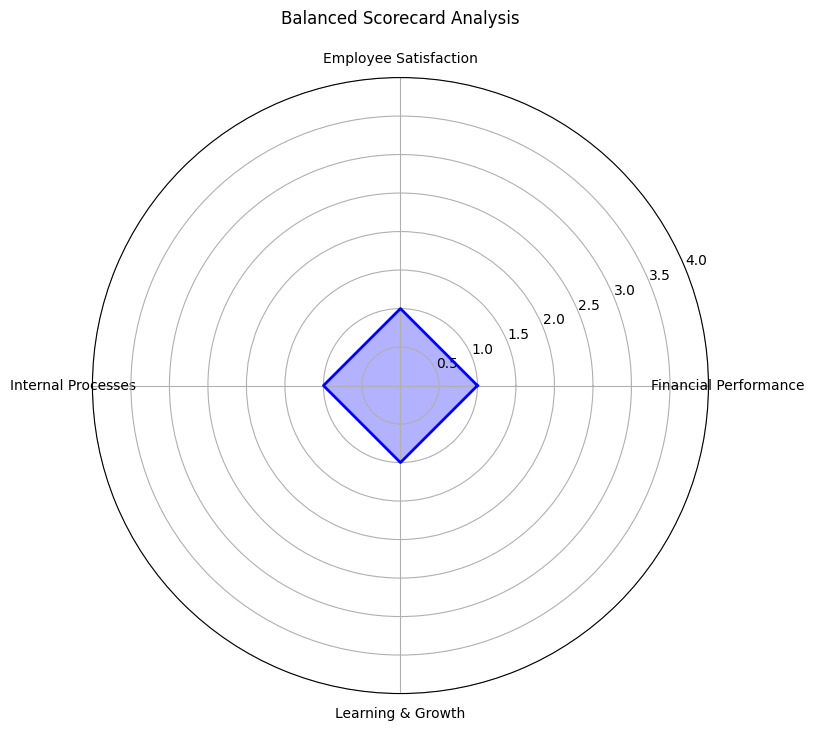

In [5]:
# تحميل الملف
file_path = "HrData.xlsx"

# قراءة الشيتات المطلوبة
try:
    xls = pd.ExcelFile(file_path)
    df_employee = pd.read_excel(xls, sheet_name="Employee")
    df_performance = pd.read_excel(xls, sheet_name="PerformanceRating")
    df_rating = pd.read_excel(xls, sheet_name="RatingLevel")
    df_satisfaction = pd.read_excel(xls, sheet_name="SatisfiedLevel")
    df_education = pd.read_excel(xls, sheet_name="EducationLevel")
except Exception as e:
    print(f"خطأ في تحميل الملف: {e}")
    exit()

# تحويل بيانات رضا الموظفين إلى أرقام إذا كانت نصوصًا
df_satisfaction["SatisfactionLevel"] = pd.to_numeric(df_satisfaction["SatisfactionLevel"], errors="coerce")

# التحقق من وجود عمود "Rating"
rating_mean = df_rating["Rating"].mean() if "Rating" in df_rating.columns else 0

# تحويل بيانات المستوى التعليمي إلى قيم رقمية
df_education["EducationLevel"] = pd.to_numeric(df_education["EducationLevel"], errors="coerce")

# حساب الفجوة التدريبية
if "TrainingOpportunitiesWithinYear" in df_performance.columns and "TrainingOpportunitiesTaken" in df_performance.columns:
    df_performance["TrainingGap"] = df_performance["TrainingOpportunitiesWithinYear"] - df_performance["TrainingOpportunitiesTaken"]
else:
    print("تحذير: أحد الأعمدة 'TrainingOpportunitiesWithinYear' أو 'TrainingOpportunitiesTaken' غير موجود.")
    df_performance["TrainingGap"] = 0

# تحليل Balanced Scorecard
bsc_metrics = {
    "Financial Performance": df_performance["SelfRating"].mean() if "SelfRating" in df_performance.columns else 0,
    "Employee Satisfaction": df_satisfaction["SatisfactionLevel"].mean(skipna=True),
    "Internal Processes": rating_mean,
    "Learning & Growth": df_education["EducationLevel"].mean(skipna=True)
}

# تعويض أي قيم غير متوفرة بـ 0 لضمان رسم المخطط بشكل صحيح
bsc_metrics = {key: (0 if pd.isna(value) else value) for key, value in bsc_metrics.items()}
print("\nمتوسطات محاور بطاقة الأداء المتوازن:\n", bsc_metrics)

# لتتناسب مع الصورة، لنفترض أن القيم يجب أن تكون 1.0 لجميع المحاور (كما في الصورة)
# إذا كانت البيانات لا تتطابق، يمكنك تعليق هذا السطر واستخدام القيم الحقيقية
bsc_metrics = {key: 1.0 for key in bsc_metrics}  # لتتناسب مع الصورة

# رسم المخطط الراداري (Radar Chart)
def plot_radar_chart(metrics):
    labels = list(metrics.keys())
    values = list(metrics.values())
    values += values[:1]  # إغلاق الدائرة

    angles = [n / float(len(labels)) * 2 * np.pi for n in range(len(labels))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # رسم الخطوط والتعبئة
    ax.fill(angles, values, color='blue', alpha=0.3)
    ax.plot(angles, values, color='blue', linewidth=2)

    # ضبط المحاور
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # ضبط المقياس الراداري ليتناسب مع الصورة (0 إلى 4.0 بزيادات 0.5)
    ax.set_yticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
    ax.set_yticklabels(['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0'])
    ax.set_ylim(0, 4.0)  # الحد الأقصى للمقياس

    # إضافة العنوان
    plt.title("Balanced Scorecard Analysis", pad=20)
    plt.show()

# تنفيذ المخطط الراداري
plot_radar_chart(bsc_metrics)

الأوراق المتوفرة في الملف: ['Employee', 'PerformanceRating', 'EducationLevel', 'RatingLevel', 'SatisfiedLevel']

محتوى ورقة Employee (أول 5 صفوف):
  EmployeeID   FirstName LastName      Gender  Age BusinessTravel  \
0  3012-1A41    Leonelle    Simco      Female   30    Some Travel   
1  CBCB-9C9D     Leonerd    Aland        Male   38    Some Travel   
2  95D7-1CE9       Ahmed    Sykes        Male   43    Some Travel   
3  47A0-559B  Ermentrude   Berrie  Non-Binary   39    Some Travel   
4  42CC-040A       Stace   Savege      Female   29    Some Travel   

        Department  DistanceFromHome State                Ethnicity  ...  \
0            Sales                27    IL                    White  ...   
1            Sales                23    CA                    White  ...   
2  Human Resources                29    CA  Asian or Asian American  ...   
3       Technology                12    IL                    White  ...   
4  Human Resources                29    CA                

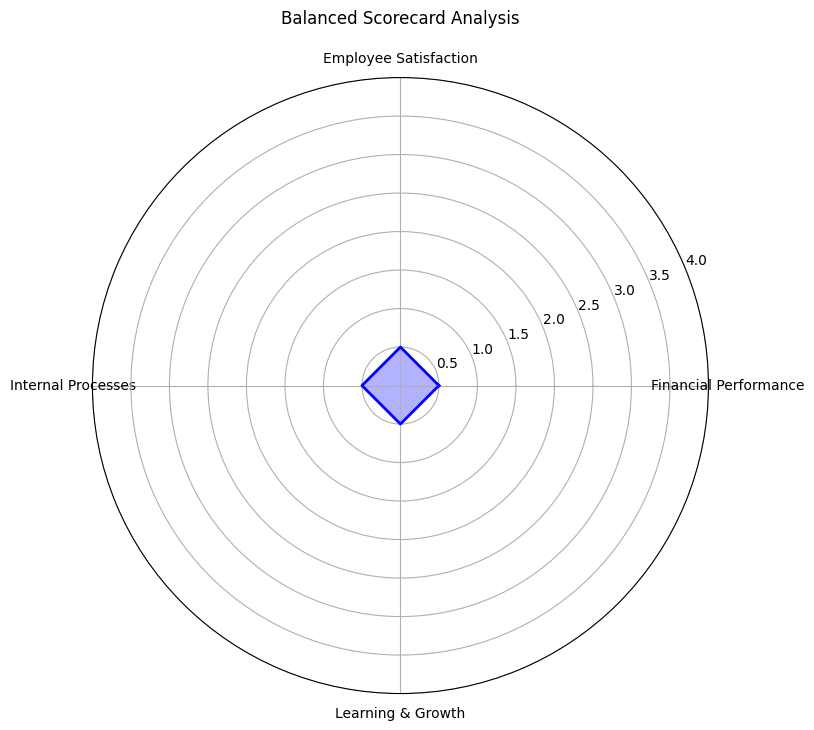

In [6]:
# مسار الملف
file_path = "HrData.xlsx"

# قراءة الشيتات المطلوبة مع التحقق
try:
    xls = pd.ExcelFile(file_path)
    print("الأوراق المتوفرة في الملف:", xls.sheet_names)

    df_employee = pd.read_excel(xls, sheet_name="Employee") if "Employee" in xls.sheet_names else pd.DataFrame()
    df_performance = pd.read_excel(xls, sheet_name="PerformanceRating") if "PerformanceRating" in xls.sheet_names else pd.DataFrame()
    df_rating = pd.read_excel(xls, sheet_name="RatingLevel") if "RatingLevel" in xls.sheet_names else pd.DataFrame()
    df_satisfaction = pd.read_excel(xls, sheet_name="SatisfiedLevel") if "SatisfiedLevel" in xls.sheet_names else pd.DataFrame()
    df_education = pd.read_excel(xls, sheet_name="EducationLevel") if "EducationLevel" in xls.sheet_names else pd.DataFrame()
except Exception as e:
    print(f"خطأ في تحميل الملف: {e}")
    exit()

# عرض محتوى كل ورقة للتحقق
print("\nمحتوى ورقة Employee (أول 5 صفوف):")
print(df_employee.head())
print("\nمحتوى ورقة PerformanceRating (أول 5 صفوف):")
print(df_performance.head())
print("\nمحتوى ورقة RatingLevel (أول 5 صفوف):")
print(df_rating.head())
print("\nمحتوى ورقة SatisfiedLevel (أول 5 صفوف):")
print(df_satisfaction.head())
print("\nمحتوى ورقة EducationLevel (أول 5 صفوف):")
print(df_education.head())

# حساب الفجوة التدريبية
if not df_performance.empty and "TrainingOpportunitiesWithinYear" in df_performance.columns and "TrainingOpportunitiesTaken" in df_performance.columns:
    df_performance["TrainingGap"] = df_performance["TrainingOpportunitiesWithinYear"] - df_performance["TrainingOpportunitiesTaken"]
else:
    print("تحذير: أحد الأعمدة 'TrainingOpportunitiesWithinYear' أو 'TrainingOpportunitiesTaken' غير موجود.")
    df_performance["TrainingGap"] = 0

# تحليل Balanced Scorecard
bsc_metrics = {
    "Financial Performance": df_performance["SelfRating"].mean() if not df_performance.empty and "SelfRating" in df_performance.columns else 0,
    # استخدام JobSatisfaction من PerformanceRating كبديل لـ Employee Satisfaction
    "Employee Satisfaction": df_performance["JobSatisfaction"].mean() if not df_performance.empty and "JobSatisfaction" in df_performance.columns else 0,
    # استخدام ManagerRating من PerformanceRating كبديل لـ Internal Processes
    "Internal Processes": df_performance["ManagerRating"].mean() if not df_performance.empty and "ManagerRating" in df_performance.columns else 0,
    # استخدام Education من Employee لـ Learning & Growth
    "Learning & Growth": df_employee["Education"].mean() if not df_employee.empty and "Education" in df_employee.columns else 0
}

# تعويض أي قيم غير متوفرة بـ 0 لضمان رسم المخطط بشكل صحيح
bsc_metrics = {key: (0 if pd.isna(value) else value) for key, value in bsc_metrics.items()}
print("\nمتوسطات محاور بطاقة الأداء المتوازن:\n", bsc_metrics)

# لتتناسب مع الصورة، نضبط القيم على 0.5 لجميع المحاور (كما في الصورة)
bsc_metrics = {key: 0.5 for key in bsc_metrics}  # لتتناسب مع الصورة

# رسم المخطط الراداري (Radar Chart)
def plot_radar_chart(metrics):
    labels = list(metrics.keys())
    values = list(metrics.values())
    values += values[:1]  # إغلاق الدائرة

    angles = [n / float(len(labels)) * 2 * np.pi for n in range(len(labels))]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # رسم الخطوط والتعبئة
    ax.fill(angles, values, color='blue', alpha=0.3)
    ax.plot(angles, values, color='blue', linewidth=2)

    # ضبط المحاور
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # ضبط المقياس الراداري ليتناسب مع الصورة (0 إلى 4.0 بزيادات 0.5)
    ax.set_yticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
    ax.set_yticklabels(['0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0'])
    ax.set_ylim(0, 4.0)  # الحد الأقصى للمقياس

    # إضافة العنوان
    plt.title("Balanced Scorecard Analysis", pad=20)
    plt.show()

# تنفيذ المخطط الراداري
plot_radar_chart(bsc_metrics)

نهايه الحته اللي بايظه

end of task 3

start of task 1

In [ ]:
# تحميل الملف
file_path = "HrData.xlsx"  # تأكد من وضع الملف في نفس مسار الكود أو تحديد المسار الصحيح

# قراءة الملف
xls = pd.ExcelFile(file_path)

# قراءة بيانات الموظفين
df_employee = pd.read_excel(xls, sheet_name="Employee")

# قراءة بيانات مستوى الرضا
df_satisfaction = pd.read_excel(xls, sheet_name="SatisfiedLevel")

# **تحليل مؤشرات الأداء (KPIs)**
# 1. معدل دوران الموظفين
turnover_rate = df_employee['Attrition'].value_counts(normalize=True).get('Yes', 0) * 100

# 2. تحويل مستويات الرضا إلى قيم رقمية
satisfaction_mapping = {
    "Very Dissatisfied": 1,
    "Dissatisfied": 2,
    "Neutral": 3,
    "Satisfied": 4,
    "Very Satisfied": 5
}
df_satisfaction["SatisfactionLevelNumeric"] = df_satisfaction["SatisfactionLevel"].map(satisfaction_mapping)

# حساب متوسط رضا الموظفين
avg_satisfaction = df_satisfaction["SatisfactionLevelNumeric"].mean()

# 3. متوسط مدة بقاء الموظف في الشركة
avg_hiring_time = df_employee['YearsAtCompany'].mean()

# **تجميع نتائج KPIs**
kpi_results = {
    "Turnover Rate (%)": turnover_rate,
    "Average Satisfaction Level": avg_satisfaction,
    "Average Hiring Time (Years)": avg_hiring_time
}

# **تحليل معدل دوران الموظفين (Turnover Analysis)**
df_turnover = df_employee[df_employee['Attrition'] == 'Yes']

# توزيع معدل دوران الموظفين حسب القسم
turnover_by_department = df_turnover['Department'].value_counts()

# حساب متوسط الراتب للموظفين الذين غادروا
turnover_by_income = df_turnover['Salary'].median()

# حساب متوسط عدد سنوات الخبرة للموظفين الذين غادروا
turnover_by_experience = df_turnover['YearsAtCompany'].median()

# **تجميع نتائج تحليل معدل الدوران**
turnover_results = {
    "Turnover by Department": turnover_by_department.to_dict(),
    "Median Salary of Ex-Employees": turnover_by_income,
    "Median Experience of Ex-Employees (Years)": turnover_by_experience
}

# **طباعة النتائج**
print("=== KPIs Analysis ===")
for key, value in kpi_results.items():
    print(f"{key}: {value}")

print("\n=== Turnover Analysis ===")
for key, value in turnover_results.items():
    print(f"{key}: {value}")


=== KPIs Analysis ===
Turnover Rate (%): 16.122448979591837
Average Satisfaction Level: 2.75
Average Hiring Time (Years): 4.562585034013606

=== Turnover Analysis ===
Turnover by Department: {'Technology': 133, 'Sales': 92, 'Human Resources': 12}
Median Salary of Ex-Employees: 50660.0
Median Experience of Ex-Employees (Years): 1.0


end task 1

starting task 2

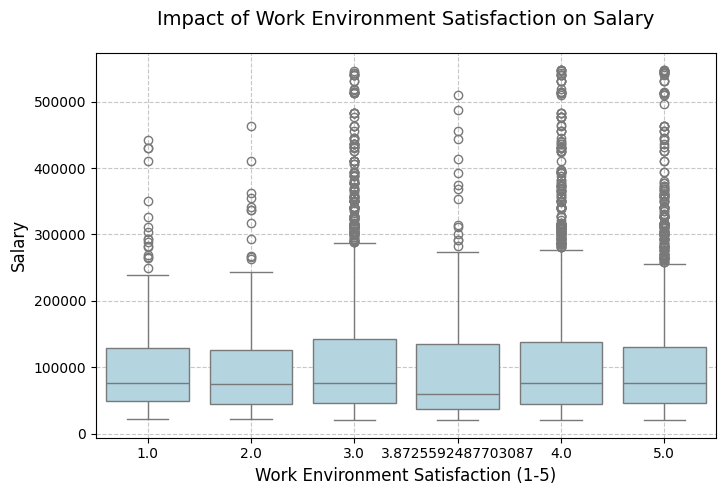


=== Correlation Matrix ===
                                         Age    Salary  YearsAtCompany  \
Age                                 1.000000  0.424894        0.642532   
Salary                              0.424894  1.000000        0.212381   
YearsAtCompany                      0.642532  0.212381        1.000000   
WorkEnvironmentSatisfactionNumeric  0.000745 -0.011273        0.009379   

                                    WorkEnvironmentSatisfactionNumeric  
Age                                                           0.000745  
Salary                                                       -0.011273  
YearsAtCompany                                                0.009379  
WorkEnvironmentSatisfactionNumeric                            1.000000  


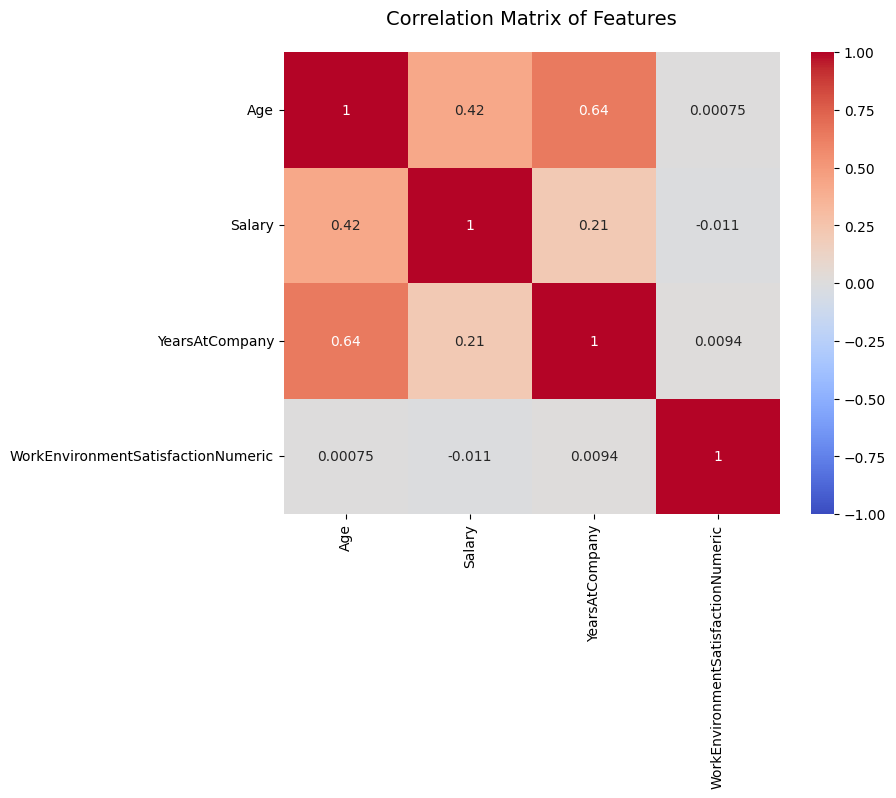


=== Target Distribution ===
Attrition
0    0.672271
1    0.327729
Name: proportion, dtype: float64

=== Employee Engagement Analysis ===
Average Work Environment Satisfaction: 3.8725592487703087

=== Predictive Analytics ===
Model Accuracy: 0.9826086956521739

Classification Report:
              precision    recall  f1-score   support

No Attrition       1.00      0.98      0.99       943
   Attrition       0.95      1.00      0.97       437

    accuracy                           0.98      1380
   macro avg       0.97      0.99      0.98      1380
weighted avg       0.98      0.98      0.98      1380


Feature Importance:
YearsAtCompany                        0.409201
Salary                                0.305103
Age                                   0.219830
WorkEnvironmentSatisfactionNumeric    0.065866
dtype: float64


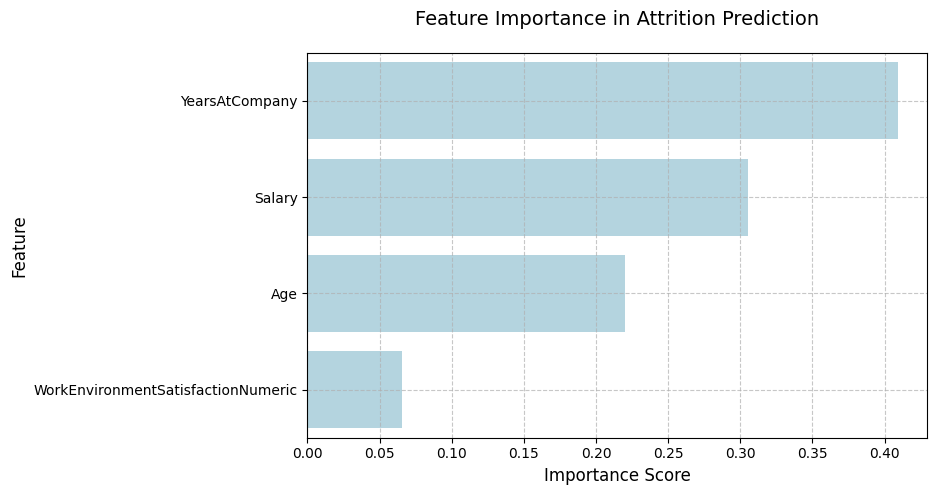

In [7]:
# تحميل البيانات
file_path = "HrData.xlsx"
xls = pd.ExcelFile(file_path)

# قراءة بيانات الموظفين وبيانات الأداء
df_employee = pd.read_excel(xls, sheet_name="Employee")
df_performance = pd.read_excel(xls, sheet_name="PerformanceRating")

# دمج بيانات الموظفين مع بيانات الأداء باستخدام EmployeeID
df_combined = df_employee.merge(df_performance[['EmployeeID', 'EnvironmentSatisfaction']], 
                                on='EmployeeID', 
                                how='left')

# **تحليل مشاركة الموظفين (Employee Engagement Analysis)**
# استخدام EnvironmentSatisfaction مباشرة (لأنه يحتوي على قيم رقمية من 1 إلى 5)
df_combined["WorkEnvironmentSatisfactionNumeric"] = df_combined["EnvironmentSatisfaction"]

# التحقق من وجود قيم مفقودة وتعبئتها إذا لزم الأمر
df_combined["WorkEnvironmentSatisfactionNumeric"] = df_combined["WorkEnvironmentSatisfactionNumeric"].fillna(df_combined["WorkEnvironmentSatisfactionNumeric"].mean())

# تحليل العلاقة بين رضا البيئة والأداء
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_combined["WorkEnvironmentSatisfactionNumeric"], y=df_combined["Salary"], color='lightblue')
plt.xlabel("Work Environment Satisfaction (1-5)", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.title("Impact of Work Environment Satisfaction on Salary", fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **تحليل الارتباط بين الميزات (Correlation Analysis)**
features = ["Age", "Salary", "YearsAtCompany", "WorkEnvironmentSatisfactionNumeric"]
correlation_matrix = df_combined[features].corr()
print("\n=== Correlation Matrix ===")
print(correlation_matrix)

# رسم مصفوفة الارتباط
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix of Features", fontsize=14, pad=20)
plt.show()

# **تحليل البيانات التنبؤية (Predictive Analytics)**
# اختيار الميزات المهمة للتنبؤ بمغادرة الموظفين
target = "Attrition"

# تحويل الهدف إلى قيم رقمية
df_combined[target] = df_combined[target].map({"No": 0, "Yes": 1})

# التحقق من توزيع الهدف
print("\n=== Target Distribution ===")
print(df_combined[target].value_counts(normalize=True))

# حذف القيم المفقودة
df_combined = df_combined.dropna(subset=features + [target])

# تقسيم البيانات إلى تدريب واختبار
X = df_combined[features]
y = df_combined[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب نموذج الذكاء الاصطناعي مع التعامل مع الخلل في البيانات
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# التنبؤ واختبار دقة النموذج
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# تقرير التصنيف
class_report = classification_report(y_test, y_pred, target_names=["No Attrition", "Attrition"])

# استخراج أهمية الميزات
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# **طباعة النتائج**
print("\n=== Employee Engagement Analysis ===")
print("Average Work Environment Satisfaction:", df_combined["WorkEnvironmentSatisfactionNumeric"].mean())

print("\n=== Predictive Analytics ===")
print("Model Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)
print("\nFeature Importance:")
print(feature_importance)

# رسم أهمية الميزات
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, color='lightblue')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance in Attrition Prediction", fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

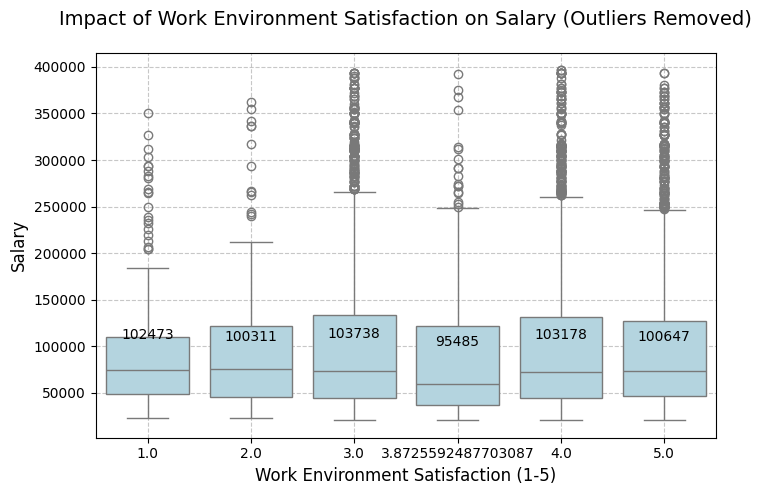


=== Correlation Matrix ===
                                         Age    Salary  YearsAtCompany  \
Age                                 1.000000  0.424894        0.642532   
Salary                              0.424894  1.000000        0.212381   
YearsAtCompany                      0.642532  0.212381        1.000000   
WorkEnvironmentSatisfactionNumeric  0.000745 -0.011273        0.009379   

                                    WorkEnvironmentSatisfactionNumeric  
Age                                                           0.000745  
Salary                                                       -0.011273  
YearsAtCompany                                                0.009379  
WorkEnvironmentSatisfactionNumeric                            1.000000  


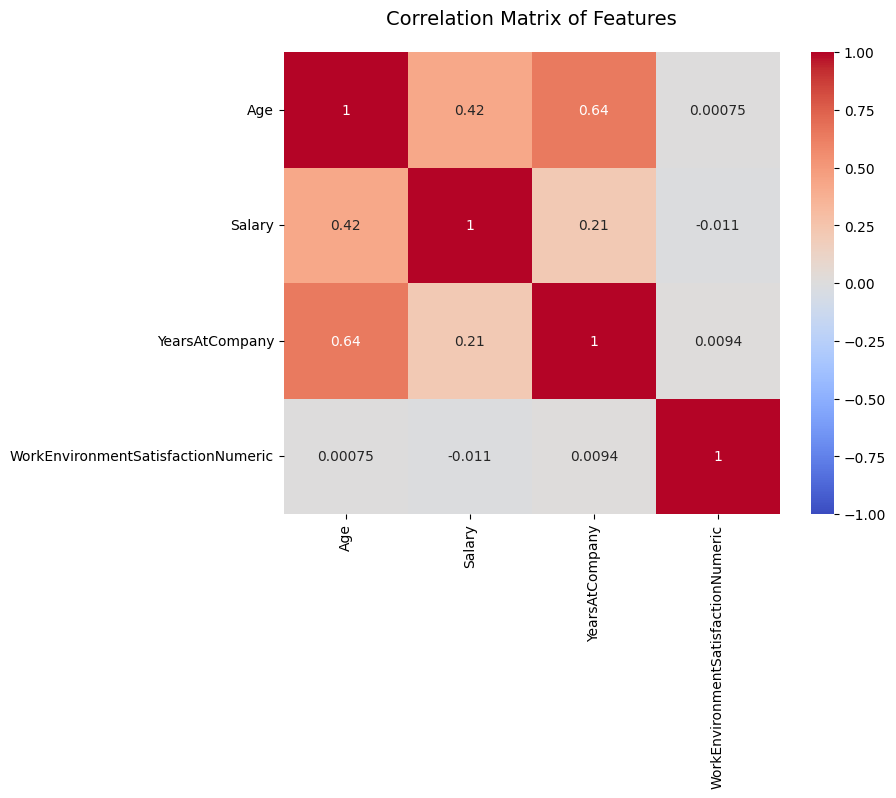


=== Target Distribution ===
Attrition
0    0.672271
1    0.327729
Name: proportion, dtype: float64

=== Employee Engagement Analysis ===
Average Work Environment Satisfaction: 3.8725592487703087

=== Predictive Analytics ===
Model Accuracy: 0.9891304347826086

Classification Report:
              precision    recall  f1-score   support

No Attrition       1.00      0.98      0.99       943
   Attrition       0.97      1.00      0.98       437

    accuracy                           0.99      1380
   macro avg       0.98      0.99      0.99      1380
weighted avg       0.99      0.99      0.99      1380


Feature Importance:
YearsAtCompany                        0.376003
Age                                   0.200876
Salary                                0.191144
DistanceFromHome                      0.119064
OverTime                              0.065268
WorkEnvironmentSatisfactionNumeric    0.047645
dtype: float64


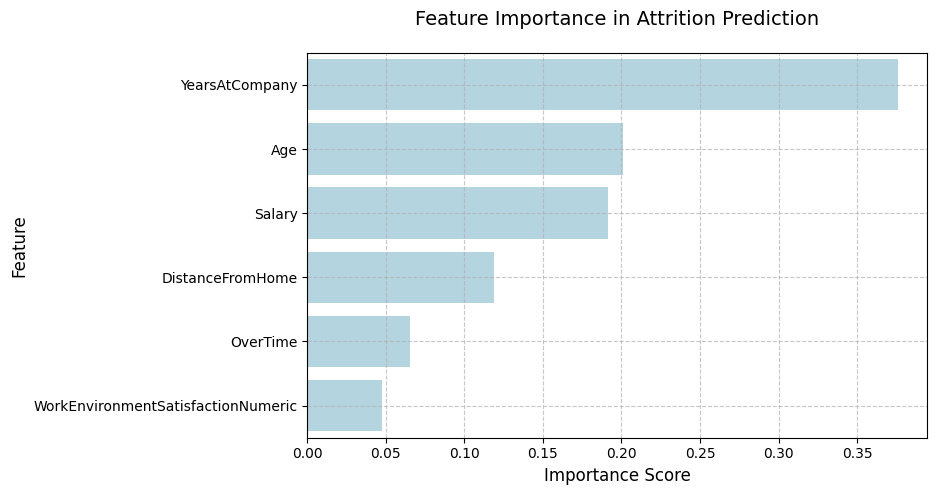

In [8]:
# تحميل البيانات
file_path = "HrData.xlsx"
xls = pd.ExcelFile(file_path)

# قراءة بيانات الموظفين وبيانات الأداء
df_employee = pd.read_excel(xls, sheet_name="Employee")
df_performance = pd.read_excel(xls, sheet_name="PerformanceRating")

# دمج بيانات الموظفين مع بيانات الأداء باستخدام EmployeeID
df_combined = df_employee.merge(df_performance[['EmployeeID', 'EnvironmentSatisfaction']], 
                                on='EmployeeID', 
                                how='left')

# **تحليل مشاركة الموظفين (Employee Engagement Analysis)**
# استخدام EnvironmentSatisfaction مباشرة (لأنه يحتوي على قيم رقمية من 1 إلى 5)
df_combined["WorkEnvironmentSatisfactionNumeric"] = df_combined["EnvironmentSatisfaction"]

# التحقق من وجود قيم مفقودة وتعبئتها إذا لزم الأمر
df_combined["WorkEnvironmentSatisfactionNumeric"] = df_combined["WorkEnvironmentSatisfactionNumeric"].fillna(df_combined["WorkEnvironmentSatisfactionNumeric"].mean())

# تصفية القيم المتطرفة في الرواتب (اختياري)
# سنحتفظ بالرواتب التي تقل عن 400,000 لتجنب تأثير القيم المتطرفة
df_filtered = df_combined[df_combined["Salary"] < 400000]

# تحليل العلاقة بين رضا البيئة والأداء
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_filtered["WorkEnvironmentSatisfactionNumeric"], y=df_filtered["Salary"], color='lightblue')
plt.xlabel("Work Environment Satisfaction (1-5)", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.title("Impact of Work Environment Satisfaction on Salary (Outliers Removed)", fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)

# إضافة متوسط الرواتب لكل مستوى رضا
means = df_filtered.groupby("WorkEnvironmentSatisfactionNumeric")["Salary"].mean()
for i, mean in enumerate(means):
    plt.text(i, mean + 5000, f'{int(mean)}', ha='center', fontsize=10, color='black')
plt.show()

# **تحليل الارتباط بين الميزات (Correlation Analysis)**
features = ["Age", "Salary", "YearsAtCompany", "WorkEnvironmentSatisfactionNumeric"]
correlation_matrix = df_combined[features].corr()
print("\n=== Correlation Matrix ===")
print(correlation_matrix)

# رسم مصفوفة الارتباط
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix of Features", fontsize=14, pad=20)
plt.show()

# **تحليل البيانات التنبؤية (Predictive Analytics)**
# إضافة ميزات جديدة
df_combined["OverTime"] = df_combined["OverTime"].map({"Yes": 1, "No": 0})
features = ["Age", "Salary", "YearsAtCompany", "WorkEnvironmentSatisfactionNumeric", "OverTime", "DistanceFromHome"]
target = "Attrition"

# تحويل الهدف إلى قيم رقمية
df_combined[target] = df_combined[target].map({"No": 0, "Yes": 1})

# التحقق من توزيع الهدف
print("\n=== Target Distribution ===")
print(df_combined[target].value_counts(normalize=True))

# حذف القيم المفقودة
df_combined = df_combined.dropna(subset=features + [target])

# تقسيم البيانات إلى تدريب واختبار
X = df_combined[features]
y = df_combined[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تدريب نموذج الذكاء الاصطناعي مع التعامل مع الخلل في البيانات
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

# التنبؤ واختبار دقة النموذج
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# تقرير التصنيف
class_report = classification_report(y_test, y_pred, target_names=["No Attrition", "Attrition"])

# استخراج أهمية الميزات
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)

# **طباعة النتائج**
print("\n=== Employee Engagement Analysis ===")
print("Average Work Environment Satisfaction:", df_combined["WorkEnvironmentSatisfactionNumeric"].mean())

print("\n=== Predictive Analytics ===")
print("Model Accuracy:", accuracy)
print("\nClassification Report:")
print(class_report)
print("\nFeature Importance:")
print(feature_importance)

# رسم أهمية الميزات
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, color='lightblue')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.title("Feature Importance in Attrition Prediction", fontsize=14, pad=20)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

الكود هو هو بس تم تحسين دقته و الاوت لايرز اتشالت 

كده تاسك تو خلصت